In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [15]:
boston = load_boston()
X = boston.data
y = boston.target
X = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2021)

In [16]:
X_train

array([[8.61718595e-03, 0.00000000e+00, 2.81524927e-01, ...,
        8.93617021e-01, 9.77406828e-01, 3.05463576e-01],
       [2.61661587e-03, 0.00000000e+00, 3.38343109e-01, ...,
        7.02127660e-01, 1.00000000e+00, 3.08774834e-01],
       [3.07969394e-05, 9.00000000e-01, 9.20087977e-02, ...,
        2.87234043e-01, 9.94503001e-01, 1.68874172e-01],
       ...,
       [8.99180711e-05, 1.00000000e+00, 3.15249267e-02, ...,
        2.65957447e-01, 9.89913763e-01, 6.12582781e-02],
       [7.51939870e-05, 3.50000000e-01, 3.88563050e-02, ...,
        3.08510638e-01, 9.94553432e-01, 1.03752759e-01],
       [1.40789220e-03, 0.00000000e+00, 3.50073314e-01, ...,
        5.53191489e-01, 9.90922386e-01, 2.84492274e-01]])

In [17]:
X_train.shape

(404, 13)

In [18]:
y_train

array([18.4, 21.2, 32.2,  7. , 17.3, 33.1, 27.5, 37.9, 27.5, 22.7, 37. ,
       24. , 15. , 21.6, 25. , 19.1, 20.1, 11. , 13.2, 26.6, 19.5,  7.2,
       18.6, 19.5, 23.2, 50. , 23.1, 13.3, 17.8, 23.3, 19.9, 24.8, 13.8,
       16.7, 18.5, 19.6, 30.1, 23.8, 28.4, 15.2, 36. , 14.3, 18.4, 13.4,
       18.8, 17.7, 20.8, 10.5, 11.5, 22.9, 14.4, 19.3, 18.7, 25. , 24.4,
       24.6, 24.6, 18.2, 13.1, 10.2, 23.9, 28.2, 17.8, 23.3, 13.4, 41.7,
       18.4, 22. , 39.8, 26.4, 24.7, 34.9, 14. , 14.9, 10.5, 25.3, 24.1,
       24.5, 20.1, 37.2, 14.6, 18.9, 14.5, 17.1, 23.9, 43.1, 20.3, 19.3,
       18.7, 20.5, 13.4, 22.1, 22.6, 14.1, 10.9, 19.4, 17.4, 20.6, 30.5,
        8.8, 20.7, 16. , 44. , 33.1, 20. , 13.5, 29.8, 14.9, 13.6, 17.4,
       21.2, 15.4, 23.8, 50. , 22.2, 31.6, 36.5, 15. , 29.4, 22.8, 24.4,
       12.1, 17.5, 37.6, 17.1, 19.1, 20.3, 32.4, 19.6, 44.8, 13.8, 17.4,
       19.9, 42.3, 21.7, 16.6, 12.3, 23.5, 50. , 21.7, 11.9, 23. , 17.2,
       33.4, 46.7, 25. ,  8.1, 50. , 14.6, 21.2, 21

In [19]:
y_train.shape

(404,)

In [20]:
class LinearRegression:

    def __init__(self,alpha=0.1,epoch=5000,fit_bias=True):
        '''
        alpha: learning rate
        epoch: the numbers of loop on entire dataset
        fit_bias: The bias. It is b in our formula
        '''
        self.alpha = alpha
        self.epoch = epoch
        self.cost_record = [] # save the cost function results
        self.fit_bias = fit_bias
        
    def predict(self,X_test):
        '''
        X_test: m x n 的 numpy 2-D array
        '''
        # If model has bias：We add x_0 = 1
        if self.fit_bias:
            x_0 = np.ones(X_test.shape[0]) # get the test sample m_test
            X_test = np.column_stack((x_0,X_test)) # combine columns. X_test is m_testx(n+1) 

        return np.dot(X_test,self.w)  # X_test: m_testx(n+1); self.w is (n+1)x1, then the dot is m_testx1. m_test is the test sample size
    
    def fit(self,X_train,y_train):
        '''
        X_train: m x n 的 numpy 2-D array
        y_train：1-D array m*1
        '''
        # If model has bias：We add x_0 = 1
        if self.fit_bias:
            x_0 = np.ones(X_train.shape[0]) # get the test sample m_train
            X_train = np.column_stack((x_0,X_train)) # combine columns. X_test is m_trainx(n+1) 

        # train data sample size
        m = X_train.shape[0]
        # number of features, now is actually n+1
        n = X_train.shape[1]
        
        # Set init coefficients
        self.w = np.ones(n)
        
        # Update the parameter w
        for i in range(self.epoch):
            # calculate the predicted outcome
            y_pred = np.dot(X_train,self.w) # X_train: m_trainx(n+1); self.w is (n+1)x1, then the dot is m_trainx1. m_train is the train sample size
            # calculate the cost function
            cost = np.dot((y_pred-y_train).T,y_pred-y_train)/(2*m) # y_pred-y_train is m_trainx1, then (y_pred-y_train).T is 1xm_train
            self.cost_record.append(cost)
            # Update w using gradient decent method
            self.w -= (self.alpha/m * np.dot((y_pred-y_train).T,X_train)).T # (y_pred-y_train).T is 1xm_train, X_train is m_train x (n+1), then self.w is 1x(n+1)

        
        # Save the model
        self.save_model() 
        

    # Save the model
    def save_model(self):
        np.savetxt("model.txt",self.w)

    # Load the model
    def load_model(self):
        self.w = np.loadtxt('model.txt')
    

In [21]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('bias：',model.w[0])
print('coefficient：',model.w[1:])
print('predict output：',y_pred[:5])

bias： 23.749868829227424
coefficient： [ -9.22097487   4.96782196   0.25226318   3.51927219  -8.05282267
  21.62582867   1.11864663 -15.37446935   7.43376237  -6.02977243
  -8.01699374   4.17102379 -20.34986179]
predict output： [22.97244637 15.86624279 22.01780445 13.44070827 37.19409866]


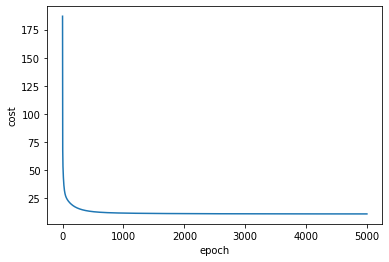

In [22]:
import matplotlib.pyplot as plt
plt.plot(np.arange(model.epoch),model.cost_record)
plt.xlabel("epoch")
plt.ylabel("cost")
plt.show()